In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
transfrom=transforms.ToTensor()
train_data=datasets.MNIST(root='../Data',train=True,download=True,transform=transfrom)
test_data=datasets.MNIST(root='../Data',train=False,download=True,transform=transfrom)

100%|██████████| 9912422/9912422 [00:00<00:00, 143057687.46it/s]

Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41598795.96it/s]


Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33518431.05it/s]

Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3829252.01it/s]


Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [ ]:
train_data[0]

In [ ]:
image, label=train_data[0]


In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
label

5

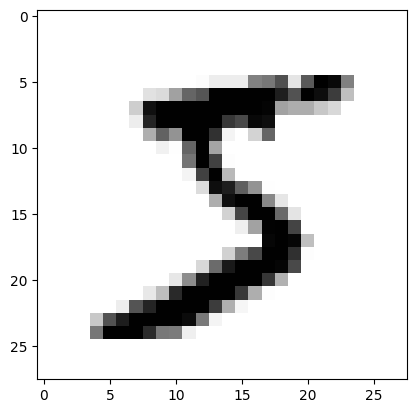

In [ ]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')

In [ ]:
torch.manual_seed(101)

train_loader=DataLoader(train_data,batch_size=100,shuffle=True)
test_loader=DataLoader(test_data,batch_size=500,shuffle=False)


In [ ]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [ ]:
for images,labels in train_loader:
  break

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


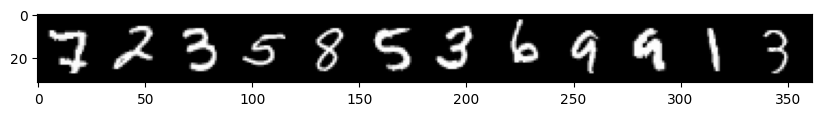

In [ ]:
print('Labels: ',labels[:12].numpy())

im=make_grid(images[:12],nrow=12)
plt.figure(figsize=(10,4))

plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [ ]:
class MultilayerPerceptron(nn.Module):
  def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):

    super().__init__()

    self.fc1=nn.Linear(in_sz,layers[0])
    self.fc2=nn.Linear(layers[0],layers[1])
    self.fc3=nn.Linear(layers[1],out_sz)

  def forward(self,X):

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X,dim=1)



In [ ]:
torch.manual_seed(101)

model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
images.view(100,-1).shape

torch.Size([100, 784])

In [ ]:
import time
start_time = time.time()

epochs=10

train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

for i in range(epochs):
  trn_corr=0
  tst_corr=0

  for b,(X_train,y_train) in enumerate(train_loader):
    # passing to the model and calculate loss
    b += 1
    y_pred=model(X_train.view(100,-1))
    loss=criterion(y_pred,y_train)

    predicted =torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%200 ==0:
      acc=trn_corr.item()*100/(100*b)
      print(f'Epoch {i} batch{b} loss:{loss.item()} accuracy:{acc}')
  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val=model(X_test.view(500,-1))

      predicted=torch.max(y_val.data,1)[1]
      tst_corr += (predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


total_time=time.time()-start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 batch200 loss:0.17374129593372345 accuracy:96.07
Epoch 0 batch400 loss:0.05462674796581268 accuracy:96.22
Epoch 0 batch600 loss:0.14082524180412292 accuracy:96.26166666666667
Epoch 1 batch200 loss:0.2053317278623581 accuracy:96.79
Epoch 1 batch400 loss:0.15751396119594574 accuracy:96.77
Epoch 1 batch600 loss:0.09102818369865417 accuracy:96.77
Epoch 2 batch200 loss:0.2504822015762329 accuracy:97.41
Epoch 2 batch400 loss:0.03461365029215813 accuracy:97.265
Epoch 2 batch600 loss:0.040836263447999954 accuracy:97.18333333333334
Epoch 3 batch200 loss:0.15014827251434326 accuracy:97.6
Epoch 3 batch400 loss:0.10345672816038132 accuracy:97.5
Epoch 3 batch600 loss:0.08916428685188293 accuracy:97.36666666666666
Epoch 4 batch200 loss:0.058919187635183334 accuracy:97.685
Epoch 4 batch400 loss:0.03352775424718857 accuracy:97.71
Epoch 4 batch600 loss:0.07446208596229553 accuracy:97.68166666666667
Epoch 5 batch200 loss:0.04134879261255264 accuracy:97.765
Epoch 5 batch400 loss:0.000889473827555